In [ ]:

'''
std name :
Mohammad Salah Ahmed
'''

'\nstd name :\nMohammad Salah isleem\nLaith Khalid Aldabbas\nMohammad Abdullah Hasweh\n\n'

In [ ]:
ادم = "adam"

# Loading the data

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/Twitter_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


# Data preprocessing

In [ ]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [ ]:
df.dropna(axis=0,inplace = True)
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

clean_text     object
category      float64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

train_data , val_data = train_test_split(df , test_size=0.2 , random_state= 42)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 3000

oov_tok = 'oov'

embedding_dim = 16

max_length = 60

padding_type='post'
trunc_type='post'

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_data['clean_text'])
word_index = tokenizer.word_index

X_train = tokenizer.texts_to_sequences(train_data['clean_text'])
X_train = pad_sequences(X_train, padding='post', maxlen=max_length)

X_val = tokenizer.texts_to_sequences(val_data['clean_text'])
X_val = pad_sequences(X_val, padding='post', maxlen=max_length)


y_train = train_data['category']
y_val = val_data['category']

In [ ]:
import tensorflow as tf
# since the range of categories are -1 , 0 , 1 and rule range is 0 to infinty , we will convert the negative to 0 and netural to 1 and positive to 2
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=3)


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95.0% accuracy so cancelling training!")
            self.model.stop_training = True
callback = myCallback()


# Model implemination

In [ ]:
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(3000, 16, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_conv.compile(loss='categorical_crossentropy', optimizer=ادم, metrics=['accuracy'])

history_conv = model_conv.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])


Epoch 1/5
4075/4075 [==============================] - 64s 14ms/step - loss: 0.4646 - accuracy: 0.8337 - val_loss: 0.2681 - val_accuracy: 0.9199
Epoch 2/5
4075/4075 [==============================] - 32s 8ms/step - loss: 0.2836 - accuracy: 0.9203 - val_loss: 0.2670 - val_accuracy: 0.9252
Epoch 3/5
4075/4075 [==============================] - 30s 7ms/step - loss: 0.2559 - accuracy: 0.9264 - val_loss: 0.2564 - val_accuracy: 0.9282
Epoch 4/5
4075/4075 [==============================] - 30s 7ms/step - loss: 0.2318 - accuracy: 0.9318 - val_loss: 0.2506 - val_accuracy: 0.9287
Epoch 5/5
4075/4075 [==============================] - 30s 7ms/step - loss: 0.2124 - accuracy: 0.9358 - val_loss: 0.2689 - val_accuracy: 0.9238


In [ ]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(3000, 16, input_length=max_length),
    tf.keras.layers.LSTM(128, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_lstm.compile(loss='categorical_crossentropy',
                   optimizer=ادم,
                   metrics=['accuracy'])

history_lstm = model_lstm.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])


Epoch 1/3
4075/4075 [==============================] - 66s 15ms/step - loss: 0.6889 - accuracy: 0.7049 - val_loss: 0.3881 - val_accuracy: 0.8770
Epoch 2/3
4075/4075 [==============================] - 46s 11ms/step - loss: 0.3393 - accuracy: 0.8967 - val_loss: 0.2993 - val_accuracy: 0.9127
Epoch 3/3
4075/4075 [==============================] - 46s 11ms/step - loss: 0.2802 - accuracy: 0.9206 - val_loss: 0.2705 - val_accuracy: 0.9199


In [ ]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GRU(64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_gru.compile(loss='categorical_crossentropy', optimizer=ادم, metrics=['accuracy'])

history_gru = model_gru.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])


Epoch 1/3
4075/4075 [==============================] - 757s 185ms/step - loss: 1.0605 - accuracy: 0.4438 - val_loss: 1.0606 - val_accuracy: 0.4410
Epoch 2/3
4075/4075 [==============================] - 746s 183ms/step - loss: 1.0594 - accuracy: 0.4439 - val_loss: 1.0607 - val_accuracy: 0.4410
Epoch 3/3
4075/4075 [==============================] - 743s 182ms/step - loss: 1.0591 - accuracy: 0.4439 - val_loss: 1.0606 - val_accuracy: 0.4410


In [ ]:
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation="softmax")
])

flatten_model.compile(loss='categorical_crossentropy', optimizer=ادم, metrics=['accuracy'])

history_flatten = flatten_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])


Epoch 1/5
4075/4075 [==============================] - 34s 8ms/step - loss: 0.4072 - accuracy: 0.8577 - val_loss: 0.3019 - val_accuracy: 0.9105
Epoch 2/5
4075/4075 [==============================] - 18s 4ms/step - loss: 0.2656 - accuracy: 0.9210 - val_loss: 0.2923 - val_accuracy: 0.9133
Epoch 3/5
4075/4075 [==============================] - 18s 4ms/step - loss: 0.2211 - accuracy: 0.9317 - val_loss: 0.2938 - val_accuracy: 0.9132
Epoch 4/5
4075/4075 [==============================] - 18s 4ms/step - loss: 0.1774 - accuracy: 0.9437 - val_loss: 0.3289 - val_accuracy: 0.9035
Epoch 5/5
4075/4075 [==============================] - ETA: 0s - loss: 0.1409 - accuracy: 0.9547
Reached 95.0% accuracy so cancelling training!
4075/4075 [==============================] - 18s 4ms/step - loss: 0.1409 - accuracy: 0.9547 - val_loss: 0.3668 - val_accuracy: 0.9033


# conv Loss and Training plots

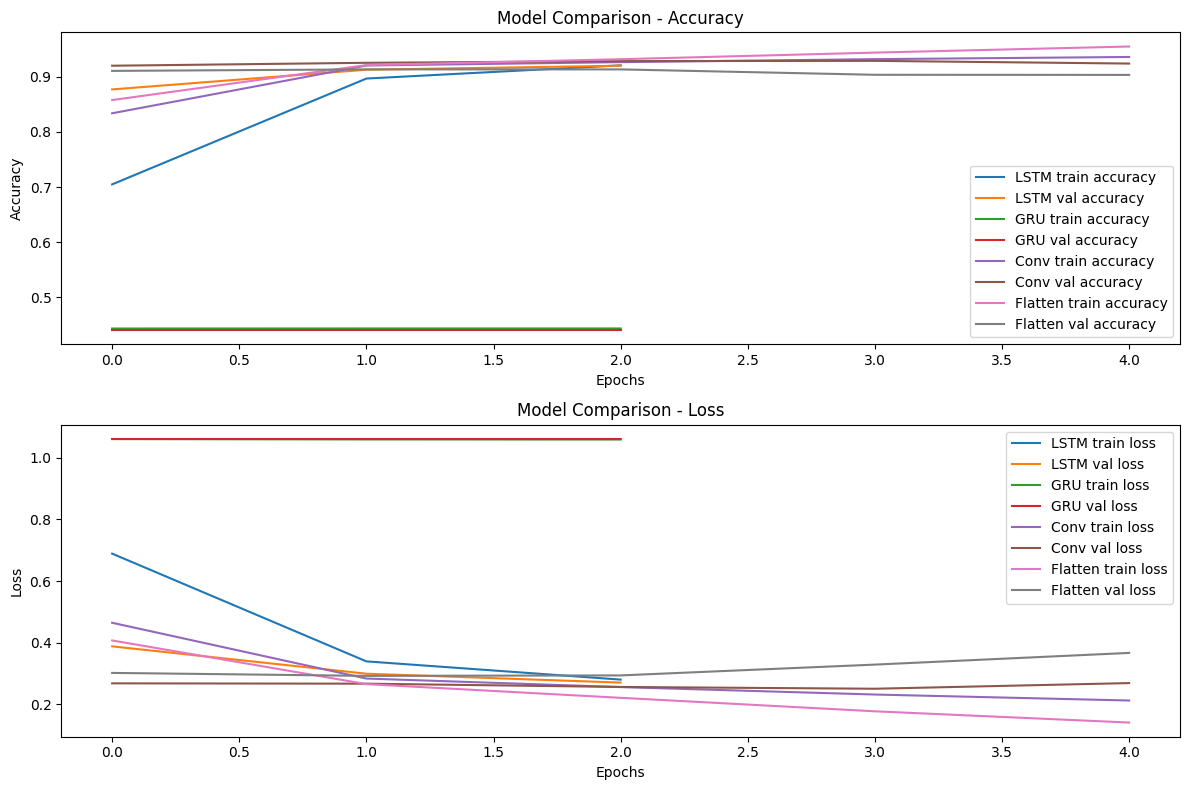

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, title):
    plt.figure(figsize=(12, 8))

    # Plot accuracy
    plt.subplot(2, 1, 1)
    for name, history in histories:
        plt.plot(history.history['accuracy'], label=f'{name} train accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{name} val accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(2, 1, 2)
    for name, history in histories:
        plt.plot(history.history['loss'], label=f'{name} train loss')
        plt.plot(history.history['val_loss'], label=f'{name} val loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

histories = [
    ('LSTM', history_lstm),
    ('GRU', history_gru),
    ('Conv', history_conv),
    ('Flatten', history_flatten)
]

plot_history(histories, 'Model Comparison')


**hyperparameters finetuning**

In [ ]:
model_gru_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, dropout=0.3, recurrent_dropout=0.3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_gru_2.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])



history_gru_2 = model_gru_2.fit(X_train, y_train,
                            epochs=5,
                            batch_size=64,
                            validation_data=(X_val, y_val),
                            callbacks=[callback])


Epoch 1/5
2038/2038 [==============================] - 1461s 712ms/step - loss: 0.4701 - accuracy: 0.8342 - val_loss: 0.2641 - val_accuracy: 0.9217
Epoch 2/5
2038/2038 [==============================] - 1441s 707ms/step - loss: 0.2961 - accuracy: 0.9206 - val_loss: 0.2450 - val_accuracy: 0.9311
Epoch 3/5
2038/2038 [==============================] - 1421s 697ms/step - loss: 0.2768 - accuracy: 0.9253 - val_loss: 0.2380 - val_accuracy: 0.9325
Epoch 4/5
2038/2038 [==============================] - 1409s 692ms/step - loss: 0.2638 - accuracy: 0.9282 - val_loss: 0.2420 - val_accuracy: 0.9335
Epoch 5/5
 302/2038 [===>..........................] - ETA: 19:49 - loss: 0.2598 - accuracy: 0.9299